# Data Management

Building a dataframe from which to sample datasets and assign labels. Can point to files and pass to featurizing pipeline.

In [1]:
import numpy as np
import pandas as pd
import librosa as lr
import glob
import matplotlib.pyplot as plt
import os

from IPython.display import Audio

In [2]:
#load existing datasets into separate dataframes

RIR_PATH = "/scratch/ci411/sonos_rirs/rirs"

ACE_PATH = os.path.join(RIR_PATH,'ace', 'Single/')

AIR_PATH = os.path.join(RIR_PATH,'air', 'wav')

OPENAIR_PATH = os.path.join(RIR_PATH,'openair')

## ACE

ACE contains subfolders with different rooms with several different samples.

We only care about the RIRs so we'll map the file with the room in the database entries

In [3]:
files = glob.glob(ACE_PATH+"**/**/*RIR.wav")
ace_pairs = []
ace_labels = []
for file in files:
    room = "ace_" + file.split('/')[7]
    ace_pairs.append((file, room))
    ace_labels.append(room)
ace_labels = list(set(ace_labels))

In [4]:
len(ace_pairs)

14

In [5]:
# in m^3, pulled from Eaton et al.
ace_vol_dict = {'ace_Office_1' : 47.3, 
                'ace_Lecture_Room_1' : 202,
                'ace_Meeting_Room_1' : 99.6,
                'ace_Office_2' : 48.3,
                'ace_Meeting_Room_2' : 246,
                'ace_Lecture_Room_2' : 370,
                'ace_Building_Lobby' : 72.9}


In [6]:
air_labels = ["air_booth","air_lecture", "air_meeting", "air_office"]
air_pairs = []
for key in air_labels:
    search = AIR_PATH+"/*{}*.wav".format(key)
    files = glob.glob(search)
    for file in np.sort(files):
        air_pairs.append((file, key))
        

In [7]:
len(air_pairs)

68

In [8]:
#in m^3, from Jeub et al.

air_vol_dict = {'air_booth' : 3.00 * 1.80 * 2.20,
                'air_lecture' : 10.80 * 10.90 * 3.15,
                'air_meeting' : 8.00 * 5.00 * 3.10,
                'air_office' : 5.00 * 6.40 * 2.90}

In [9]:
ace_df = pd.DataFrame(ace_pairs, columns=['file','room'])
ace_df['dataset'] = "ace"
ace_df['vol'] = ace_df['room'].apply(lambda x : ace_vol_dict[x])

air_df = pd.DataFrame(air_pairs, columns=['file','room'])
air_df['dataset'] = "air"
air_df['vol'] = air_df['room'].apply(lambda x : air_vol_dict[x])

In [10]:
ace_df.to_csv(os.path.join(ACE_PATH, 'ace_df.csv'))
air_df.to_csv(os.path.join(AIR_PATH, 'air_df.csv'))


In [12]:
pra_df = pd.read_csv(os.path.join(RIR_PATH, 'pra', '080322_pra_df.csv'), index_col=0)

In [15]:
rir_df = pd.concat([ace_df,air_df,pra_df])

In [16]:
rir_df.to_csv('/home/ci411/volume_estimation/data/0721_rir_df.csv')

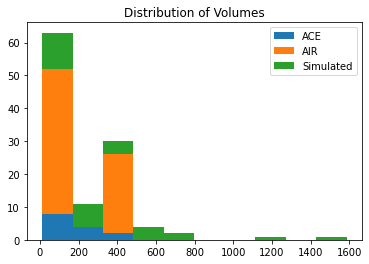

In [17]:
plt.title("Distribution of Volumes")
plt.hist([ace_df['vol'], air_df['vol'], pra_df['vol']], stacked=True, label=['ACE','AIR', 'Simulated'],bins=10)
plt.legend()

In [18]:
openair_rooms = os.listdir(OPENAIR_PATH)
openair_rooms = np.sort(openair_rooms)[1:] #removes .DS_Store

In [19]:
#from csv of volumes

vols = [
21000,
1560,
8000,
908.23,
2300,
35.2,
9000,
2000,
13000,
100,
3500,
18000,
2398.8,
9000,
6000,
2600,
3600,
8000,
4500,
3500,
40,
15700,
1140]

In [20]:
openair_tuples = []
for i, room in enumerate(openair_rooms):
    #vol_dict[room] = vols[i]
    room_audio_search = os.path.join(OPENAIR_PATH, room, 'b-format','*.wav')
    files = glob.glob(room_audio_search)
    for file in files:
        openair_tuples.append((file, room, 'openair', vols[i]))

In [21]:
openair_df = pd.DataFrame(openair_tuples, columns=['file', 'room', 'dataset', 'vol'])
openair_df

,file,room,dataset,vol
0,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
1,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
2,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
3,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
4,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
...,...,...,...,...
199,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
200,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
201,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
202,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0


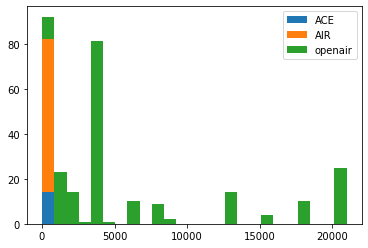

In [22]:
plt.hist([ace_df['vol'], air_df['vol'], openair_df['vol']], stacked=True, label=['ACE','AIR', 'openair'],bins=25)
plt.legend()

In [23]:
Audio('/scratch/ci411/sonos_rirs/rirs/BUT_ReverbDB/VUT_FIT_D105/MicID01/SpkID02_20170901_S/02/RIR/IR_sweep_15s_45Hzto22kHz_FS16kHz.v00.wav')

In [24]:
but_path = os.path.join(RIR_PATH, 'BUT_ReverbDB')
but_rooms = next(os.walk(but_path))[1]

but_tuples = []
for room in but_rooms:
    room_dir = os.path.join(but_path, room)
    room_df = pd.read_csv(os.path.join(room_dir, 'env_meta.txt'), sep='\t', header=None)\
                .transpose()
    room_df.columns = room_df.iloc[0]
    room_volume = float(room_df.iloc[1]['$EnvVolume'])
    
    speakers = os.listdir(os.path.join(room_dir, 'MicID01'))
    for spk in speakers:
        speaker_dir = os.path.join(room_dir, 'MicID01', spk)
        mic_df = pd.read_csv(os.path.join(speaker_dir, '01', 'mic_meta.txt'),
                             sep='\t', header=None).transpose()
        mic_df.columns = mic_df.iloc[0]
        mic_rate = float(mic_df.iloc[1]['$EnvMic1RecRate'])
        
        rir_path = os.path.join(speaker_dir, '01', 'RIR', '*.wav')
        rir_file = glob.glob(rir_path)[0]
        
        but_tuples.append((rir_file, room, 'BUT_ReverbDB', room_volume))

but_df = pd.DataFrame(but_tuples, columns=['file', 'room', 'dataset', 'vol'])


43
30


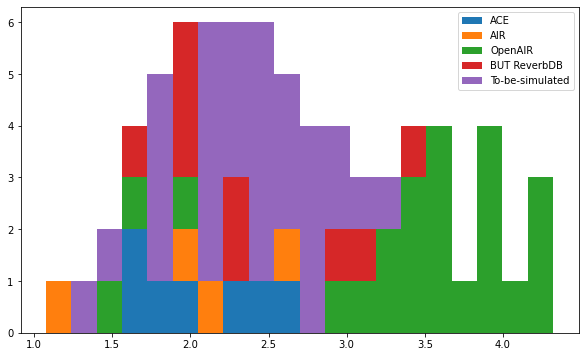

In [25]:
ace_vols = ace_df.drop_duplicates('room')['vol'].apply(np.log10)
air_vols = air_df.drop_duplicates('room')['vol'].apply(np.log10)
openair_vols = openair_df.drop_duplicates('room')['vol'].apply(np.log10)
but_vols = but_df.drop_duplicates('room')['vol'].apply(np.log10)

openair_lowvols = openair_vols[openair_vols<200]

add_vols = [1.3, 1.4, 1.76, 1.8, 1.82, 1.84,2.05, 2.1, 2.14, 2.19,2.2, 2.23,\
            2.3, 2.31, 2.39, 2.4, 2.43, 2.5, 2.53, 2.55, 2.6, 2.65, 2.7, 2.72,\
            2.75, 2.8, 2.87, 2.9, 3.1, 3.2]

#using this list to generate data


print(len(ace_vols) + len(air_vols) + len(openair_vols) + len(but_vols))
print(len(add_vols))


fig = plt.figure(figsize=(10,6))
plt.hist([ace_vols, air_vols, openair_lowvols, but_vols, add_vols], stacked=True,\
         label=['ACE','AIR', 'OpenAIR', 'BUT ReverbDB', 'To-be-simulated'],bins=20)
plt.legend()

In [26]:
pra_8df = pd.read_csv(os.path.join(RIR_PATH, 'pra','080322_pra_df.csv'))

In [27]:
rir_2_df = pd.concat([ace_df,air_df,openair_df, but_df, pra_8df]).reset_index()

<AxesSubplot:>

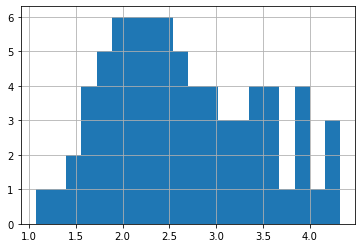

In [28]:
rir_2_df.drop_duplicates('room')['vol'].apply(np.log10).hist(bins=20)

In [29]:
rir_2_df.to_csv('/home/ci411/volume_estimation/0803_rir_df.csv', index=False)

In [30]:
rir_2_df = pd.read_csv('/home/ci411/volume_estimation/0803_rir_df.csv') 
print(rir_2_df.columns)

Index(['index', 'file', 'room', 'dataset', 'vol'], dtype='object')


In [31]:
from scipy.io import loadmat

boston_path = os.path.join(RIR_PATH, 'sonos_boston')
boston_rir_names = os.listdir(boston_path)
boston_rir_names.sort()

test_mat = loadmat(os.path.join(boston_path, boston_rir_names[5]))

print()
print("Rate: {}".format(test_mat['specs'][0][0][5][0][0]))
print()
print("Dims: {}".format(test_mat['specs'][0][0][8][0]))
print()
print("Data: {}".format(test_mat['data'][0][0][0].shape))
Audio(data=test_mat['data'][0][0][0][:,0], rate = 44100)


Rate: 44100

Dims: [14.57  8.9   4.15]

Data: (132300, 1)


Data: (4,)
Data: (88200,)
(88200, 1)
(88200, 1)
(88200, 1)
(0, 0)


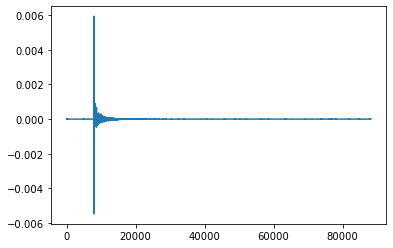

In [32]:
test_mat = loadmat(os.path.join(boston_path, boston_rir_names[0]))

print("Data: {}".format(test_mat['data'][0].shape))
print("Data: {}".format(test_mat['data'][0][0][0][:,0].shape))

for i in range(4):
    print(test_mat['data'][0][i][0].shape)
    
plt.plot(test_mat['data'][0][0][0])

In [33]:
import soundfile as sf

In [34]:
#save_audio
rir_wav_path = '/scratch/ci411/sonos_rirs/rirs/sonos_boston/wav'
boston_df = pd.DataFrame(columns=rir_2_df.columns)

paths = []
for room in boston_rir_names:
    room_tag = room.split('.')[0]
    print(room_tag)
    room_path = os.path.join(boston_path, room)
    mat = loadmat(room_path)
    rate = mat['specs'][0][0][5][0][0]
    dims = mat['specs'][0][0][8][0]
    vol = dims[0] * dims[1] * dims[2]
    
    new_row = {'room':room_tag, 'dataset':'sonos_boston', 'vol':vol}
    print("Rate: {}\tVol: {}".format(rate, vol))
    for i in range(3):
        rir_tag = room_tag + '_{}'.format(i)
        rir_data = mat['data'][0][i][0][:,0]
        rir_data = rir_data/(max(rir_data))
        print('RIR: {}\tShape: {}'.format(rir_tag, rir_data.shape))
        wav_path = os.path.join(rir_wav_path, rir_tag+'.wav')
        print("Saving to {}".format(wav_path))
        sf.write(wav_path, rir_data, rate)
        paths.append(wav_path)
        
        new_row['file'] = wav_path
        boston_df = boston_df.append(new_row, ignore_index=True)
        
    print()
boston_df

room01
Rate: 44100	Vol: 74.52
RIR: room01_0	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room01_0.wav
RIR: room01_1	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room01_1.wav
RIR: room01_2	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room01_2.wav

room02
Rate: 44100	Vol: 197.84263499999997
RIR: room02_0	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room02_0.wav
RIR: room02_1	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room02_1.wav
RIR: room02_2	Shape: (88200,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room02_2.wav


/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df


room03
Rate: 44100	Vol: 483.261312
RIR: room03_0	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room03_0.wav
RIR: room03_1	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room03_1.wav


/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)


RIR: room03_2	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room03_2.wav

room04
Rate: 44100	Vol: 118.69228799999999
RIR: room04_0	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room04_0.wav


/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)


RIR: room04_1	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room04_1.wav
RIR: room04_2	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room04_2.wav

room05
Rate: 44100	Vol: 196.70745599999998
RIR: room05_0	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room05_0.wav


/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)


RIR: room05_1	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room05_1.wav
RIR: room05_2	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room05_2.wav

room06
Rate: 44100	Vol: 538.14295
RIR: room06_0	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room06_0.wav


/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)
/state/partition1/job-24129530/ipykernel_2016466/2992811893.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston_df = boston_df.append(new_row, ignore_index=True)


RIR: room06_1	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room06_1.wav
RIR: room06_2	Shape: (132300,)
Saving to /scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room06_2.wav

sonos_boston


ValueError: Unknown mat file type, version 115, 111

In [79]:
i = 3
print(paths[i])
Audio(filename=paths[i], rate=rate)

/scratch/ci411/sonos_rirs/rirs/sonos_boston/wav/room02_0.wav


In [35]:
boston_df.to_csv('/scratch/ci411/sonos_rirs/rirs/sonos_boston/sonos_boston.csv', index=False)

In [36]:
rir_3_df = pd.concat([rir_2_df, boston_df], ignore_index=True)

In [42]:
#rir_3_df.to_csv('/home/ci411/volume_estimation/0812_rir_df.csv', index=False)
rir_3_df = pd.read_csv('/home/ci411/volume_estimation/data/0812_rir_df.csv')

Text(0.5, 1.0, 'Volume by Dataset')

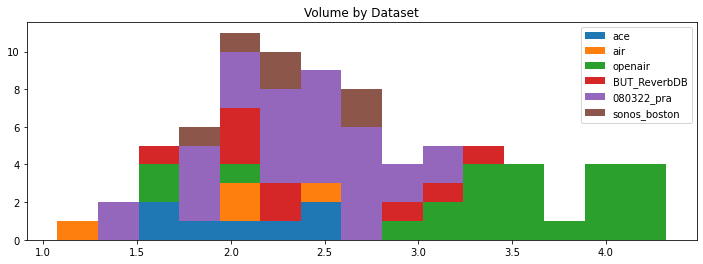

In [43]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(12,4))
bins = 15
log_vols = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    vols = sub_df['vol'].to_numpy()
    log_vols.append(np.log10(vols))
    
plt.hist(log_vols, bins=bins, stacked=True, label=datasets)
plt.legend()
plt.title("Volume by Dataset")

Text(0.5, 1.0, 'RT60 by Dataset')

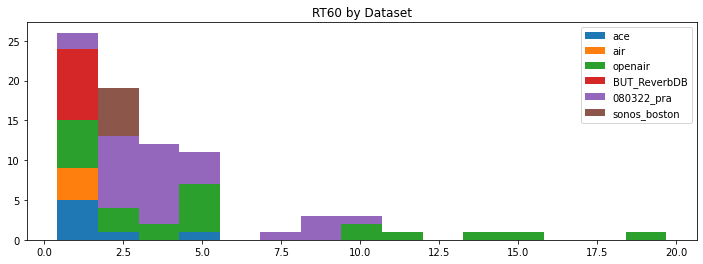

In [44]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(12,4))
bins = 15
rt60s_all = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    rt60s = sub_df['mean_rt60'].to_numpy()
    rt60s_all.append(rt60s)
    
plt.hist(rt60s_all, bins=bins, stacked=True, label=datasets)
plt.legend()
plt.title("RT60 by Dataset")

In [45]:
real_rooms = unique_rooms[unique_rooms['dataset']!='080322_pra']

['maes-howe', 'dixon-studio-theatre-university-york', 'st-andrews-church', 'VUT_FIT_Q301', 'VUT_FIT_L227', 'terrys-factory-warehouse', 'heslington-church-vaa-group-2', 'st-patricks-church-patrington', 'Hotel_SkalskyDvur_ConferenceRoom2', 'VUT_FIT_C236']


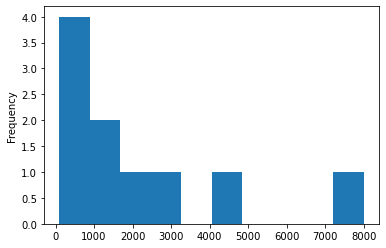

In [46]:
sample = real_rooms.sample(10)
sample['vol'].plot.hist()
print(sample['room'].tolist())